In [4]:
pip install torch numpy matplotlib pywavelets

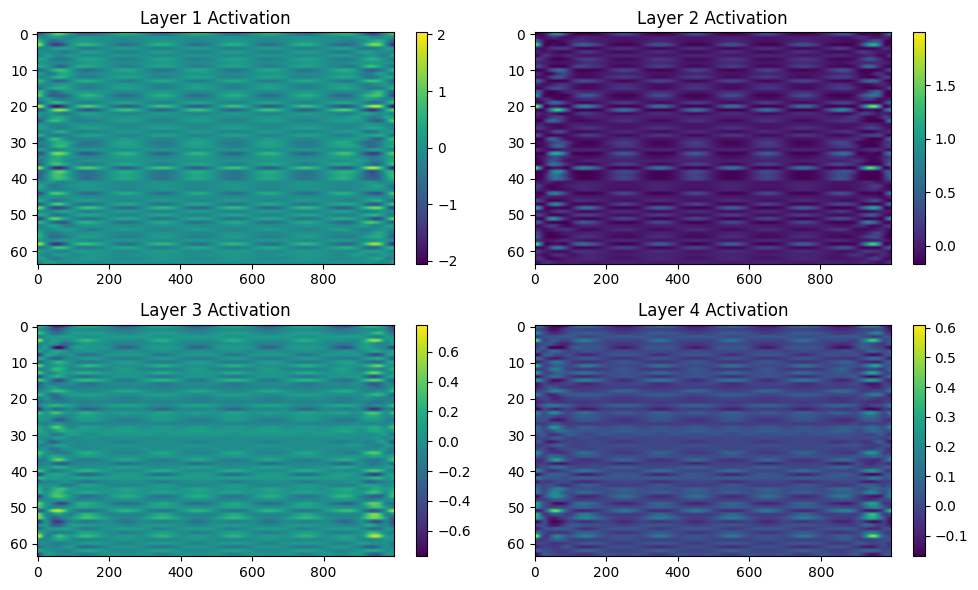

In [10]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Define a simple ConvMixer model
class ConvMixer(nn.Module):
    def __init__(self, in_channels, num_layers, hidden_dim, kernel_size):
        super(ConvMixer, self).__init__()
        self.layers = nn.Sequential(
            nn.Conv1d(in_channels, hidden_dim, kernel_size),
            nn.GELU(),
            nn.Conv1d(hidden_dim, hidden_dim, kernel_size),
            nn.GELU(),
            # Add more layers as needed
        )

    def forward(self, x):
        return self.layers(x)

# Create a sample signal
t = np.linspace(0, 1, 1000, endpoint=False)
frequency = 5  # Frequency of the signal in Hz
signal = np.sin(2 * np.pi * frequency * t)

# Define the wavelet and scales for the scalogram
wavelet = 'morl'  # Morlet wavelet is commonly used
scales = np.arange(1, 101)  # Adjust the range of scales as needed

# Calculate the continuous wavelet transform
coeffs, freqs = pywt.cwt(signal, scales, wavelet)

# Create a ConvMixer model
input_channels = 100
num_layers = 4
hidden_dim = 64
kernel_size = 3
conv_mixer = ConvMixer(input_channels, num_layers, hidden_dim, kernel_size)

# Visualize individual layers (activations)
with torch.no_grad():
    x = torch.tensor(coeffs, dtype=torch.float32).unsqueeze(0)  # Add batch dimension
    activations = []

    for layer in conv_mixer.layers:
        x = layer(x)
        activations.append(x.squeeze().numpy())

# Plot individual layers' activations
plt.figure(figsize=(10, 6))
for i, activation in enumerate(activations):
    plt.subplot(len(activations)//2, 2, i+1)
    plt.imshow(activation, cmap='viridis', aspect='auto')
    plt.title(f'Layer {i+1} Activation')
    plt.colorbar()

plt.tight_layout()
plt.show()
